<h1 style="font-size:3rem;color:orange;">Assignment 3</h1>

<h1 style="font-size:1rem;color:Black;">220046275 Danielle Low</h1>
<h1 style="font-size:1rem;color:Black;">Date: 10 April 2023</h1>
<h1 style="font-size:1rem;color:Black;">Source: https://www.kaggle.com/datasets/adityamishraml/laptops</h1>
<h1 style="font-size:1rem;color:Black;">Github url: https://github.com/lildandan/JupyterNotebook.git </h1>

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
sample_data = pd.read_csv('laptops.csv')

<h1 style="font-size:2rem;color:Green;">Data Set</h1>

In [9]:
sample_data

,indx,Company,TypeName,Inches,touchscreen,ipspanel,retinadisplay,resolution_width,resolution_height,cpu_brand,...,Memory,hdd,ssd,flashstorage,hybrid,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,1,Toshiba,Ultrabook,13.3,0,0,0,1920,1080,Intel,...,256GB SSD,0,256,0,0,Intel,HD Graphics 520,windows,1.20,72621
1,2,Apple,Ultrabook,13.3,0,1,1,2560,1600,Intel,...,128GB SSD,0,128,0,0,Intel,Iris Plus Graphics 640,macos,1.37,71379
2,3,HP,Notebook,17.3,0,0,0,1920,1080,Intel,...,128GB SSD + 1TB HDD,1024,128,0,0,Nvidia,GeForce 930MX,windows,2.50,52055
3,4,Dell,Notebook,15.6,0,0,0,1920,1080,Intel,...,1TB HDD,1024,0,0,0,Intel,HD Graphics 620,windows,2.18,35005
4,5,HP,Notebook,15.6,0,0,0,1920,1080,AMD,...,256GB SSD,0,256,0,0,AMD,Radeon R4 Graphics,windows,1.86,21232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1268,Lenovo,Gaming,15.6,0,1,0,1920,1080,Intel,...,512GB SSD,0,512,0,0,Nvidia,GeForce GTX 960,windows,3.31,69530
1268,1269,Asus,Gaming,17.3,0,0,0,1920,1080,Intel,...,128GB SSD + 1TB HDD,1024,128,0,0,Nvidia,GeForce GTX 960M,windows,3.52,69929
1269,1270,MSI,Gaming,15.6,0,0,0,1920,1080,Intel,...,128GB SSD + 1TB HDD,1024,128,0,0,Nvidia,GeForce GTX 970M,windows,1.91,114732
1270,1271,Vero,Notebook,13.3,0,0,0,1920,1080,Intel,...,32GB Flash Storage,0,0,32,0,Intel,HD Graphics 400,windows,1.35,10443


<h1 style="font-size:2rem;color:Green;">Clean Data Set</h1>

In [10]:
df = pd.read_csv('laptops.csv')
df.drop(columns=['indx','touchscreen','ipspanel','retinadisplay','retinadisplay','hdd','ssd',
                'flashstorage','hybrid'], inplace=True)
# Indian Rupee to ZAR
ZAR = df["Price"]=df["Price"].apply(lambda x: x*0.22)
df

,Company,TypeName,Inches,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,Toshiba,Ultrabook,13.3,1920,1080,Intel,Core i7 6500U,2.5,8,256GB SSD,Intel,HD Graphics 520,windows,1.20,15976.62
1,Apple,Ultrabook,13.3,2560,1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macos,1.37,15703.38
2,HP,Notebook,17.3,1920,1080,Intel,Core i5 8250U,1.6,8,128GB SSD + 1TB HDD,Nvidia,GeForce 930MX,windows,2.50,11452.10
3,Dell,Notebook,15.6,1920,1080,Intel,Core i5 7200U,2.5,4,1TB HDD,Intel,HD Graphics 620,windows,2.18,7701.10
4,HP,Notebook,15.6,1920,1080,AMD,A6-Series 9220,2.5,4,256GB SSD,AMD,Radeon R4 Graphics,windows,1.86,4671.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,Lenovo,Gaming,15.6,1920,1080,Intel,Core i7 6700HQ,2.6,16,512GB SSD,Nvidia,GeForce GTX 960,windows,3.31,15296.60
1268,Asus,Gaming,17.3,1920,1080,Intel,Core i7 6700HQ,2.6,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 960M,windows,3.52,15384.38
1269,MSI,Gaming,15.6,1920,1080,Intel,Core i7 6700HQ,2.6,16,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 970M,windows,1.91,25241.04
1270,Vero,Notebook,13.3,1920,1080,Intel,Atom X5-Z8350 4,1.4,4,32GB Flash Storage,Intel,HD Graphics 400,windows,1.35,2297.46


<h1 style="font-size:2rem;color:Green;">Descriptive Statistics</h1>

In [11]:
df.describe()

,Inches,resolution_width,resolution_height,cpu_speed,Ram,Weight_kg,Price
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,15.130818,1894.199686,1070.531447,2.298192,8.463050,2.076211,13178.471478
std,1.954436,494.389426,284.512222,0.507680,5.566582,0.809869,8205.490447
min,10.100000,1366.000000,768.000000,0.900000,1.000000,0.000000,2039.620000
25%,14.000000,1600.000000,900.000000,2.000000,4.000000,1.500000,7021.300000
50%,15.600000,1920.000000,1080.000000,2.500000,8.000000,2.040000,11463.760000
75%,15.600000,1920.000000,1080.000000,2.700000,8.000000,2.320000,17433.790000
max,35.600000,3840.000000,2160.000000,3.600000,64.000000,11.100000,71490.100000


In [12]:
df.head()

,Company,TypeName,Inches,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,gpu_brand,gpu_name,OpSys,Weight_kg,Price
0,Toshiba,Ultrabook,13.3,1920,1080,Intel,Core i7 6500U,2.5,8,256GB SSD,Intel,HD Graphics 520,windows,1.20,15976.62
1,Apple,Ultrabook,13.3,2560,1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macos,1.37,15703.38
2,HP,Notebook,17.3,1920,1080,Intel,Core i5 8250U,1.6,8,128GB SSD + 1TB HDD,Nvidia,GeForce 930MX,windows,2.50,11452.10
3,Dell,Notebook,15.6,1920,1080,Intel,Core i5 7200U,2.5,4,1TB HDD,Intel,HD Graphics 620,windows,2.18,7701.10
4,HP,Notebook,15.6,1920,1080,AMD,A6-Series 9220,2.5,4,256GB SSD,AMD,Radeon R4 Graphics,windows,1.86,4671.04


In [13]:
df.tail()

,Company,TypeName,Inches,resolution_width,resolution_height,cpu_brand,cpu_name,cpu_speed,Ram,Memory,gpu_brand,gpu_name,OpSys,Weight_kg,Price
1267,Lenovo,Gaming,15.6,1920,1080,Intel,Core i7 6700HQ,2.6,16,512GB SSD,Nvidia,GeForce GTX 960,windows,3.31,15296.60
1268,Asus,Gaming,17.3,1920,1080,Intel,Core i7 6700HQ,2.6,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 960M,windows,3.52,15384.38
1269,MSI,Gaming,15.6,1920,1080,Intel,Core i7 6700HQ,2.6,16,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 970M,windows,1.91,25241.04
1270,Vero,Notebook,13.3,1920,1080,Intel,Atom X5-Z8350 4,1.4,4,32GB Flash Storage,Intel,HD Graphics 400,windows,1.35,2297.46
1271,HP,Notebook,15.6,1366,768,Intel,Core i3 6100U,2.3,4,500GB HDD,Intel,HD Graphics 520,windows,2.07,7619.04


In [14]:
gmean = stats.gmean(df["Price"])

print('Geometric mean for price: \n',gmean)

Geometric mean for price: 
 10952.953576183483


In [15]:
mode_value = df.mode(axis=0)
row = mode_value.iloc[0]
print('Mode: \n',row)


Mode: 
 Company                        Lenovo
TypeName                     Notebook
Inches                           15.6
resolution_width               1920.0
resolution_height              1080.0
cpu_brand                       Intel
cpu_name               Core i5 7200U 
cpu_speed                         2.5
Ram                               8.0
Memory                      256GB SSD
gpu_brand                       Intel
gpu_name              HD Graphics 620
OpSys                         windows
Weight_kg                         2.2
Price                         12882.1
Name: 0, dtype: object


<h1 style="font-size:2rem;color:Green;">Graphs and Charts</h1>

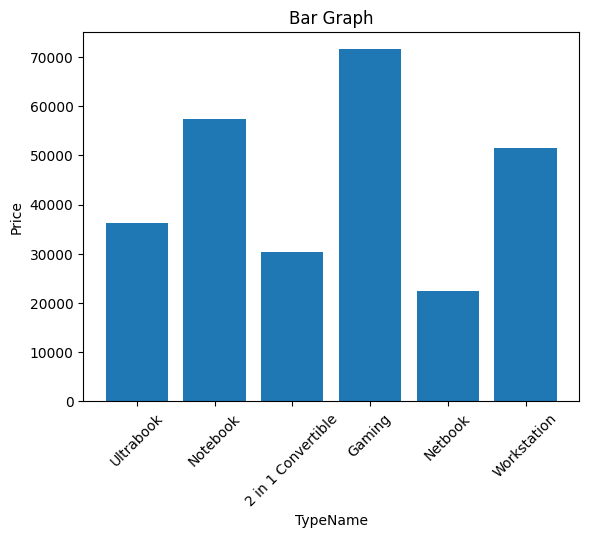

In [16]:
x = df["TypeName"]
y = df["Price"]
fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title('Bar Graph')
ax.set_xlabel('TypeName')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
plt.show()

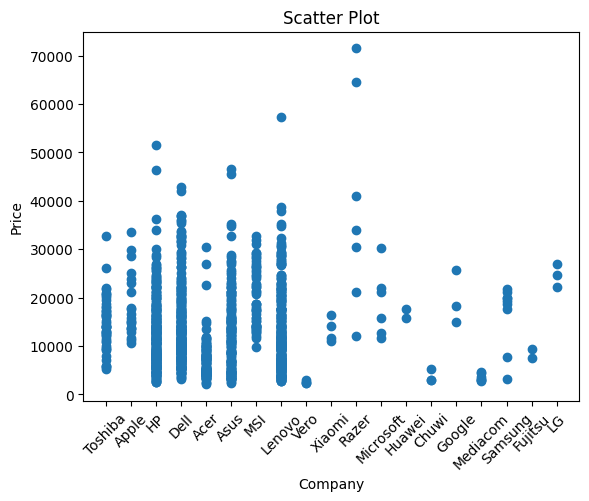

In [17]:
x = df["Company"]
y = df["Price"]
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('Scatter Plot')
ax.set_xlabel('Company')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
plt.show()

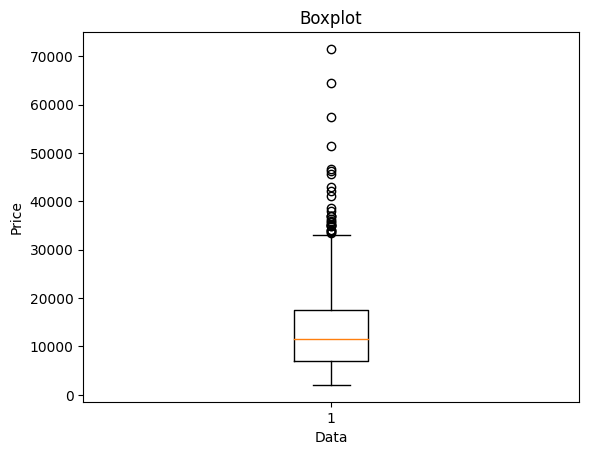

In [18]:
data = df["Price"]
plt.boxplot(data)
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Boxplot')
plt.show()

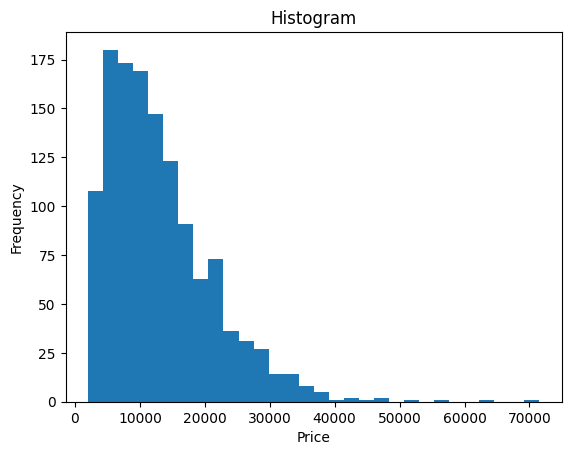

In [19]:
data = df["Price"]
plt.hist(data, bins=30)
plt.title('Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

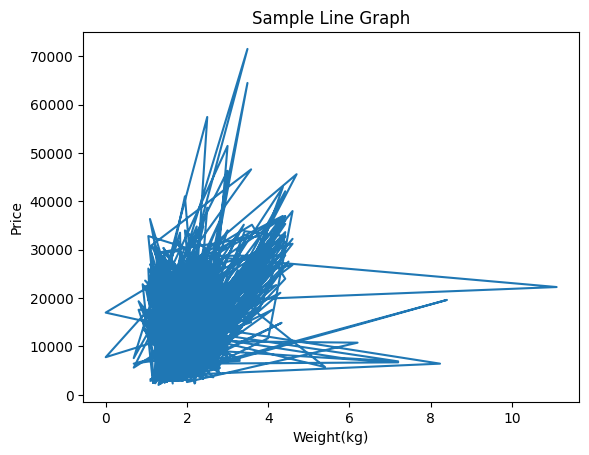

In [20]:
x = df["Weight_kg"]
y = df["Price"]
plt.plot(x, y)
plt.title('Sample Line Graph')
plt.xlabel('Weight(kg)')
plt.ylabel('Price')
plt.show()

<h1 style="font-size:2rem;color:Green;">Frequency Distribution</h1>

In [21]:
data = df["Price"]

skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

p25, p50, p75 = np.percentile(data, [25, 50, 75])

print('Skewness:', skewness)
print('Kurtosis:', kurtosis)
print('25th percentile:', p25)
print('50th percentile (median):', p50)
print('75th percentile:', p75) 

Skewness: 1.5329188525864128
Kurtosis: 4.4273280465043765
25th percentile: 7021.3
50th percentile (median): 11463.76
75th percentile: 17433.79


<h1 style="font-size:2rem;color:Green;">Conclusion</h1>

The skewness value of 1.53 indicates that the distribution of computer prices is positively skewed, which means that there are more low-priced computers than high-priced ones.The kurtosis value of 4.43 indicates that the distribution of computer prices has a higher peak and heavier tails than a normal distributiondue to the high-priced gaming computers in the market.This percentile indicates that the majority of computer prices fall within the range of 7021.3 to 17433.79, with the median price being around 11463.76. The majority of consumers tend to purchase low-priced computers.

In conclusion, weight does not affect the price, but the type of computer affect the price of the computer. In general the most expensive computer is gaming computers due to better GPU name and CPU name.